In [195]:
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib

Using pip 21.1.2 from d:\projects\put\computer-vision-project-2\venv\lib\site-packages\pip (python 3.7)
Non-user install because user site-packages disabled
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-ephem-wheel-cache-8ps5oah8
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-19jwnwrb
Initialized build tracking at C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-19jwnwrb
Created build tracker: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-19jwnwrb
Entered build tracker: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-19jwnwrb
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-install-nzc35h85
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-unpack-9x7el7o3
Removed build tracker: 'C:\\Users\\aszcz\\AppData\\Local\\Temp\\pip-req-tracker-19jwnwrb'


In [196]:
import cv2 as cv
from matplotlib import pyplot as plt

Load image

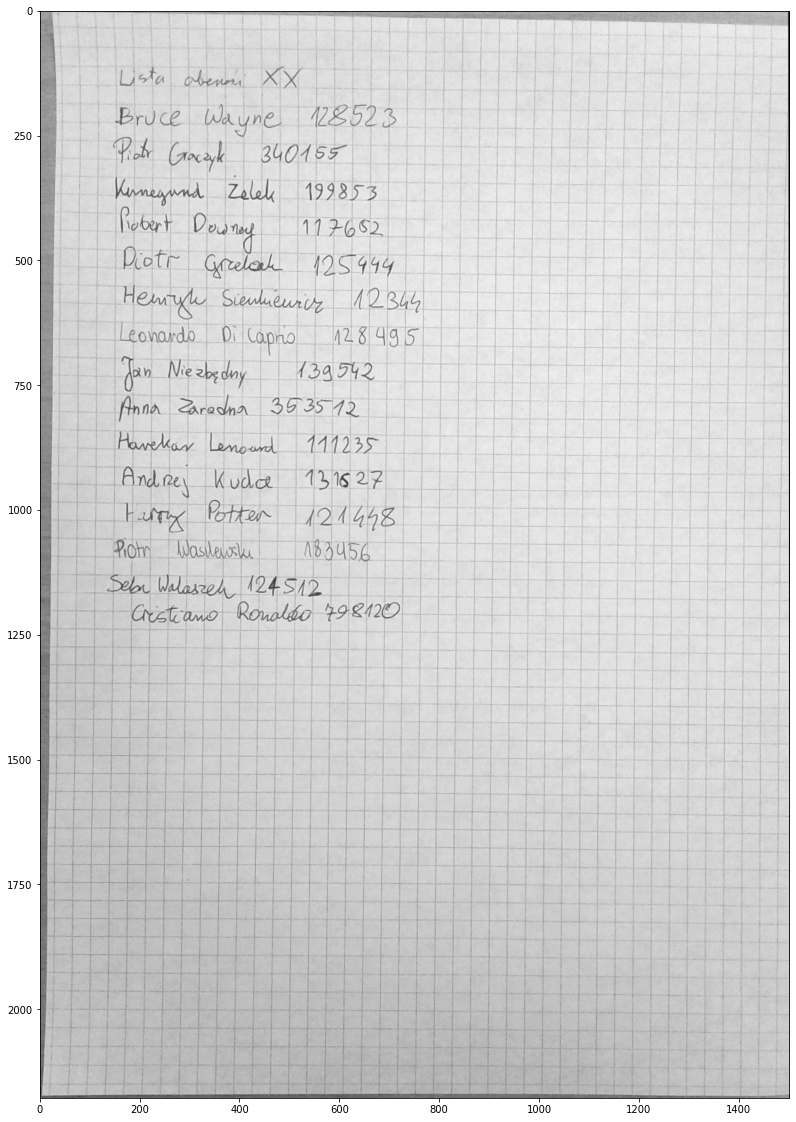

In [197]:
image_orig = cv.imread('straightened.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.imshow(image_orig, cmap='gray')
plt.show()

Denoise image for better contour detection

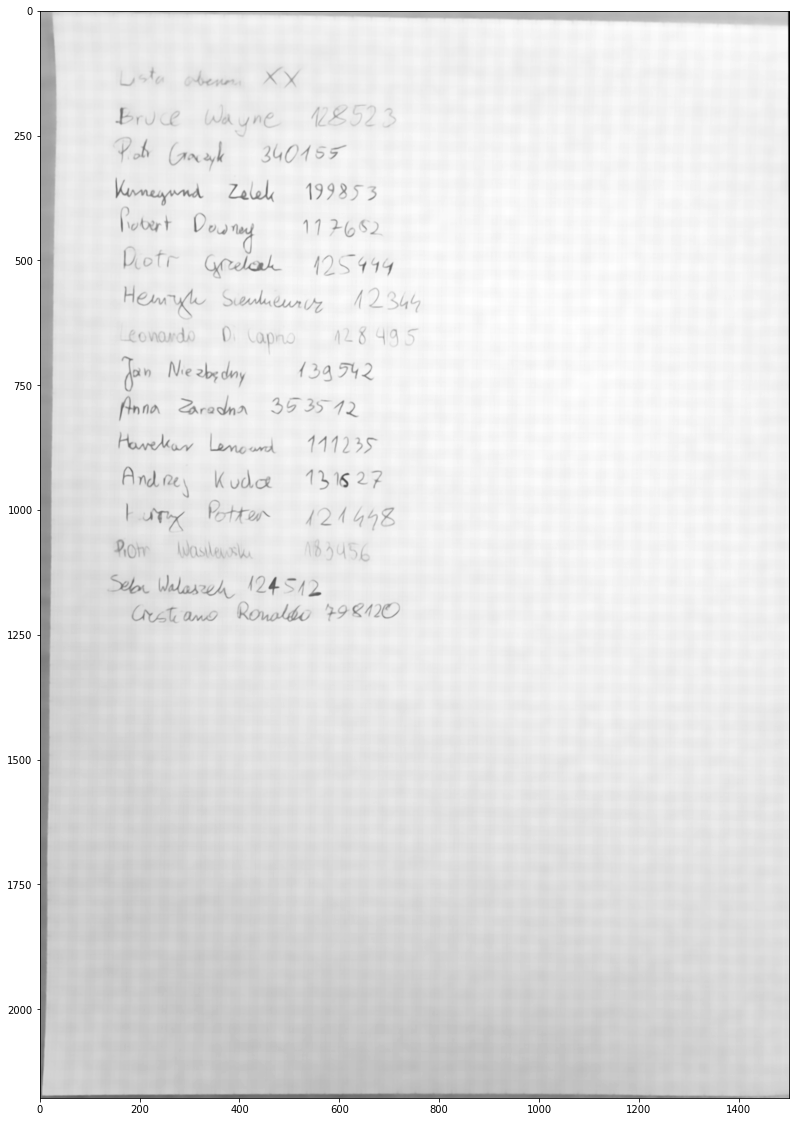

In [198]:
# https://docs.opencv.org/master/d1/d79/group__photo__denoise.html#ga4c6b0031f56ea3f98f768881279ffe93
image = cv.fastNlMeansDenoising(image_orig, None, 30, 5, 21)

plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')
plt.show()

Use Sobel edge detection

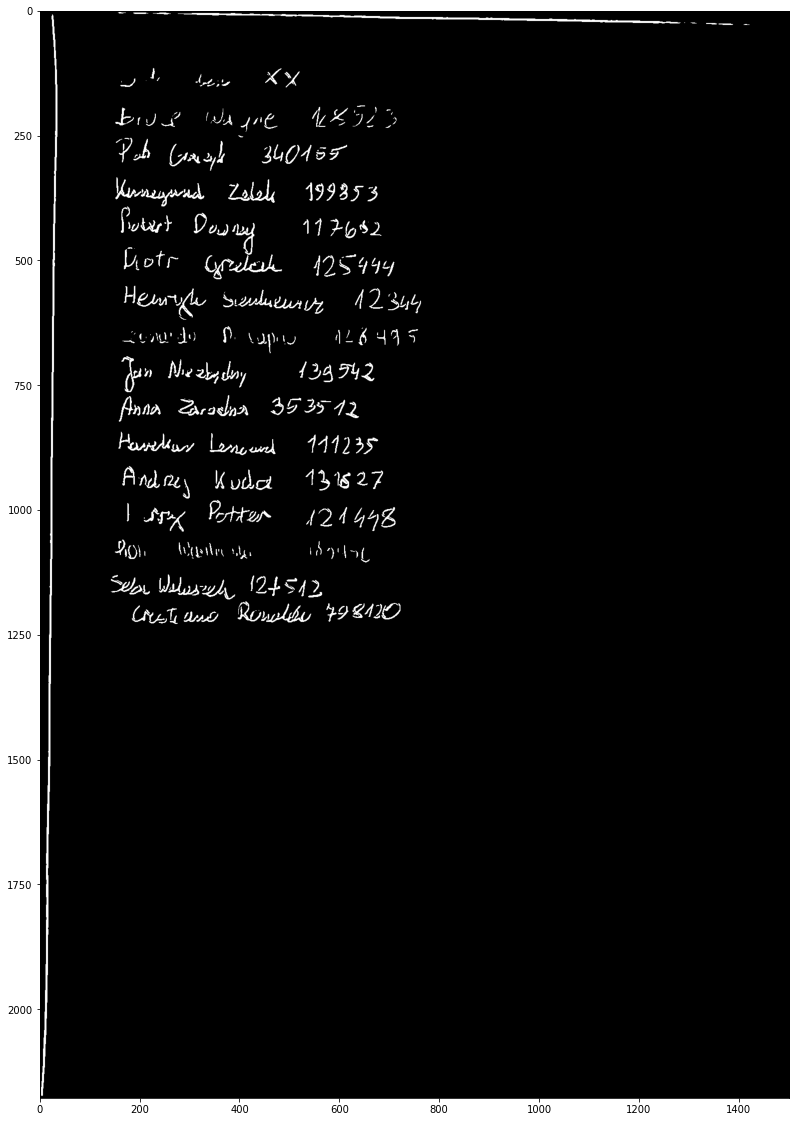

In [199]:
sobelx = cv.Sobel(image, cv.CV_8U, 1, 0, ksize=3)
sobely = cv.Sobel(image, cv.CV_8U, 0, 1, ksize=3)

sobelx = cv.fastNlMeansDenoising(sobelx, None, 15, 5, 21)
sobely = cv.fastNlMeansDenoising(sobely, None, 15, 5, 21)

sobel = cv.add(sobelx, sobely)
_, sobel = cv.threshold(sobel, 32, 255, cv.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.imshow(sobel, cmap='gray')
plt.show()

Save result image

In [ ]:
cv.imwrite("removed_lines.png", sobel)

Use Laplacian edge detection (just an example, not used in main pipeline)

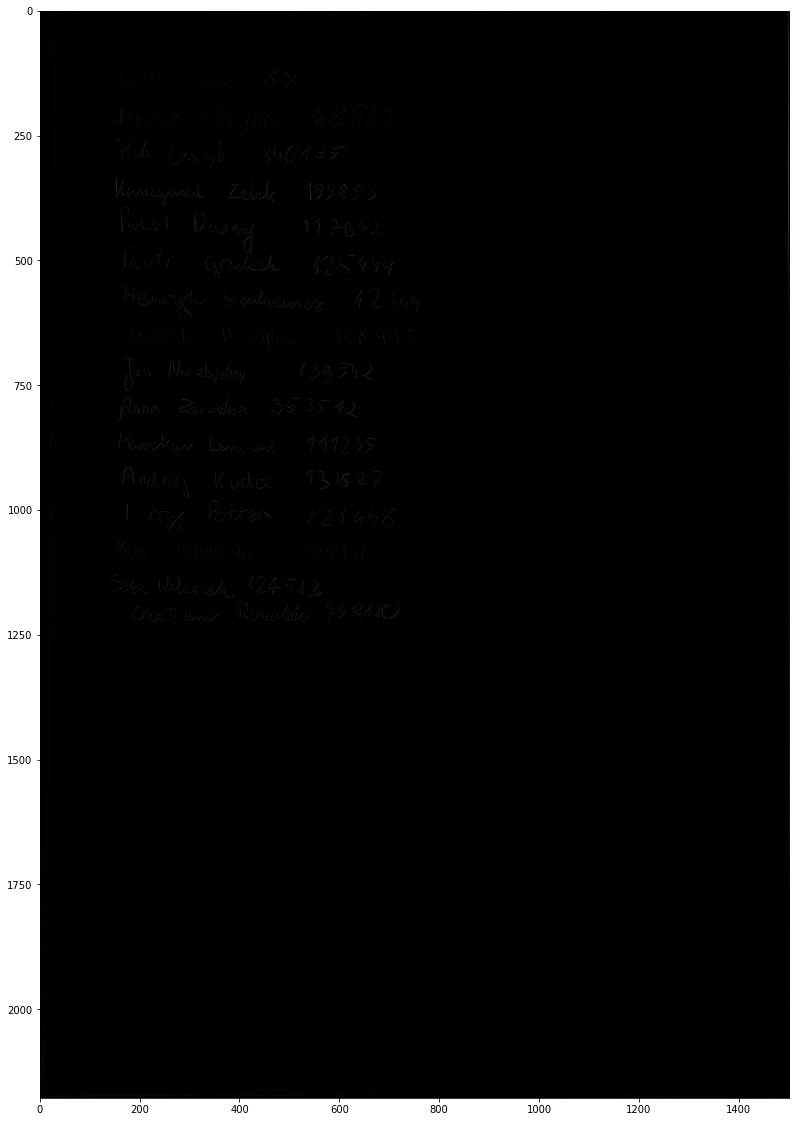

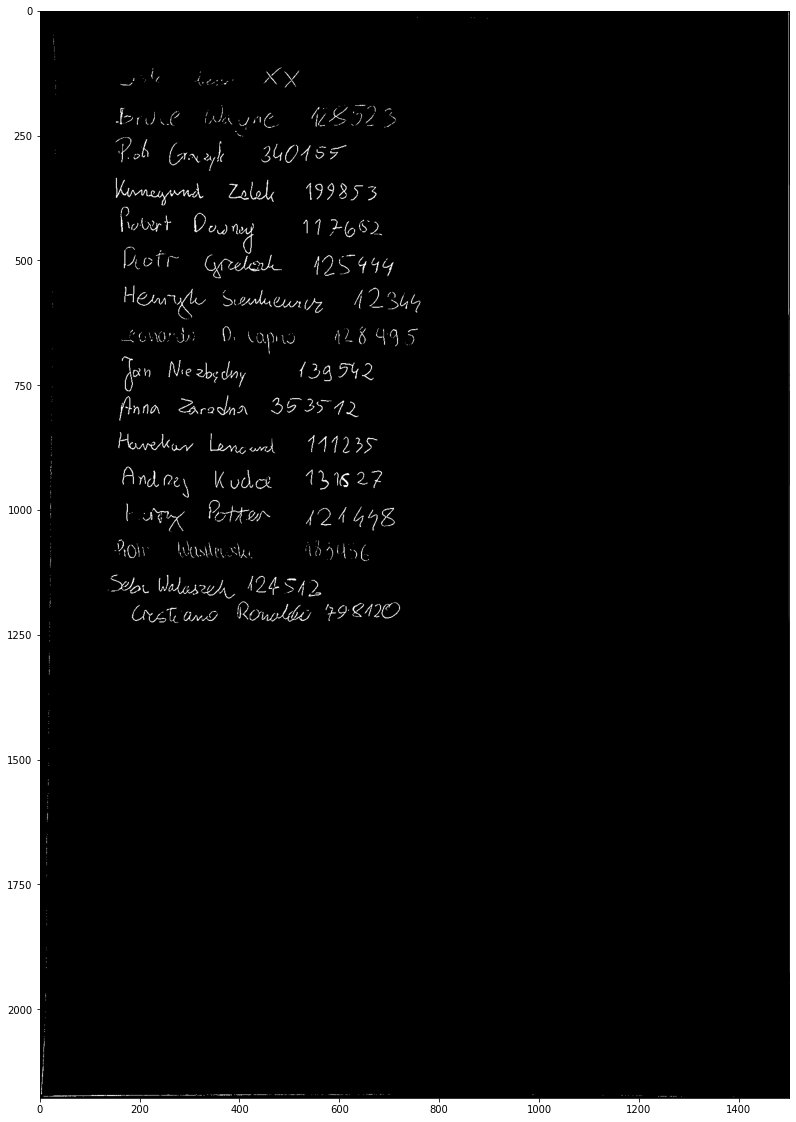

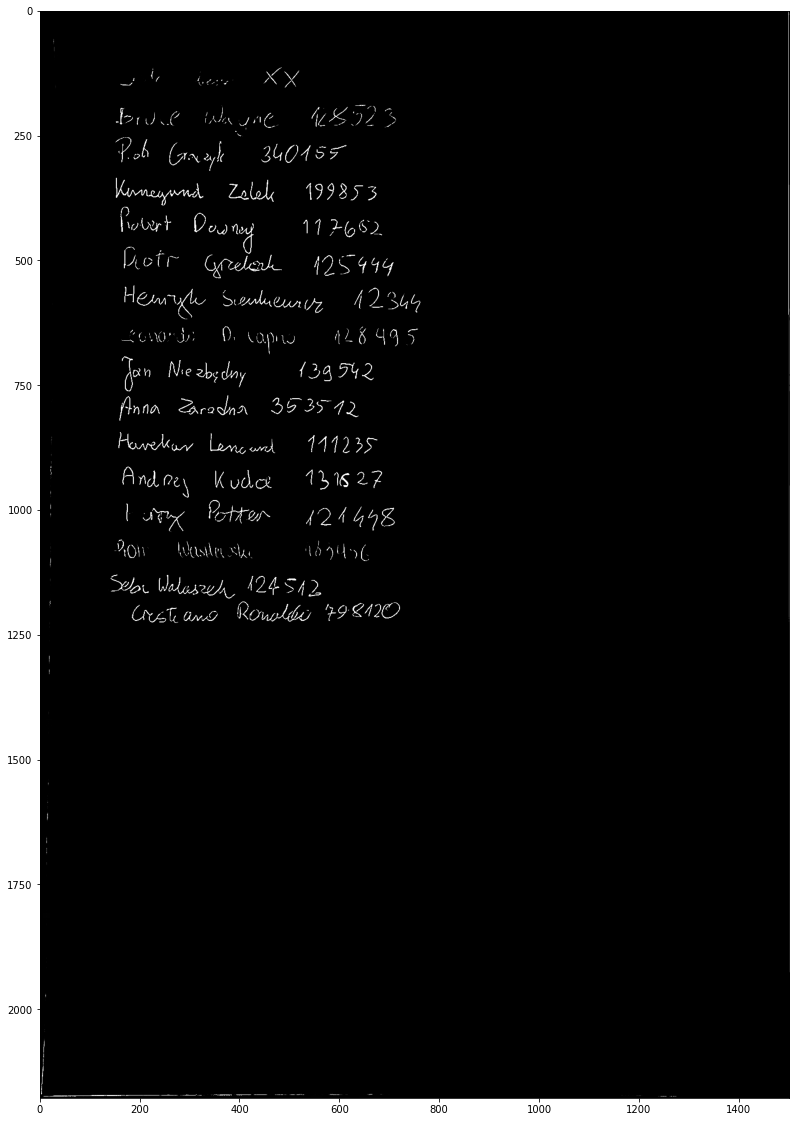

In [200]:
laplacian = cv.Laplacian(image, cv.CV_8U)

_, laplacian = cv.threshold(laplacian, 8, 255, cv.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.imshow(laplacian, cmap='gray')
plt.show()

Denoise laplacian image

In [ ]:
denoised_laplacian = cv.fastNlMeansDenoising(laplacian, None, 30, 7, 21)

plt.figure(figsize=(20, 20))
plt.imshow(denoised_laplacian, cmap='gray')
plt.show()


